<a href="https://colab.research.google.com/github/vanshbhatt12/Predictive-Modeling-for-Mental-Health/blob/main/Predictive_Modelling_for_Mental_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Nadam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import backend as K
from keras.layers import Dropout

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Mental Health Analysis/Mental_Health_Dataset.csv')

In [ ]:
data

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,0,United States,Corporate,0.0,0,1,1.00,1.0,0.0,1.0,2,0,0.0,1.0,0.0,0.5
1,8/27/2014 11:31,0,United States,Corporate,0.0,1,1,1.00,1.0,0.0,1.0,2,0,0.0,1.0,0.0,0.0
2,8/27/2014 11:32,0,United States,Corporate,0.0,1,1,1.00,1.0,0.0,1.0,2,0,0.0,1.0,0.0,1.0
3,8/27/2014 11:37,0,United States,Corporate,0.0,1,1,1.00,1.0,0.0,1.0,2,0,0.0,1.0,0.5,1.0
4,8/27/2014 11:43,0,United States,Corporate,0.0,1,1,1.00,1.0,0.0,1.0,2,0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,7/27/2015 23:25,1,United States,Business,1.0,1,1,1.25,0.0,0.5,0.0,1,1,0.0,0.5,0.5,0.5
292360,8/17/2015 9:38,1,South Africa,Business,0.0,1,1,1.25,0.0,0.5,0.0,1,1,0.0,0.5,0.0,1.0
292361,8/25/2015 19:59,1,United States,Business,0.0,1,0,1.25,0.0,0.5,0.0,1,1,0.0,0.5,0.0,0.0
292362,9/26/2015 1:07,1,United States,Business,0.0,1,1,1.25,0.0,0.5,0.0,1,1,0.0,0.5,0.0,1.0


In [ ]:
data['mental_chaos']= data['Gender'] + data['self_employed'] + data['family_history'] + data['treatment'] + data['Growing_Stress'] + data['Changes_Habits'] + data['Mental_Health_History'] + data['Mood_Swings'] + data['Coping_Struggles'] + data['Work_Interest'] + data['Social_Weakness'] + data['mental_health_interview']

In [ ]:
X = data[['Gender', 'self_employed', 'family_history', 'treatment', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'mental_health_interview']].values
y = data['mental_chaos'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001)

In [ ]:
def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [ ]:
#ANN Model of Selection
model = Sequential()
model.add(Dense(units=1500, activation='relu', input_dim=12))  # Input layer
model.add(Dropout(0.2))
model.add(Dense(units=1250, activation='relu'))  # Hidden Layer 1
model.add(Dropout(0.2))
model.add(Dense(units=1000, activation='relu'))  # Hidden layer 2
model.add(Dropout(0.2))
model.add(Dense(units=750, activation='relu'))  # Hidden layer 3
model.add(Dropout(0.2))
model.add(Dense(units=500, activation='relu'))  # Hidden layer 4
model.add(Dropout(0.2))
model.add(Dense(units=250, activation='relu'))  # Hidden layer 5
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='linear')) #Output layer

In [ ]:
model.compile(loss='mean_squared_logarithmic_error', optimizer=Nadam(learning_rate=0.0001), metrics=[r_squared])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=16, verbose=1, callbacks=[reduce_lr])

Epoch 1/10
14619/14619 [==============================] - 1104s 75ms/step - loss: 0.0087 - r_squared: 0.8107 - val_loss: 5.4338e-04 - val_r_squared: 0.9803 - lr: 1.0000e-04
Epoch 2/10
14619/14619 [==============================] - 1100s 75ms/step - loss: 0.0024 - r_squared: 0.9251 - val_loss: 6.7357e-04 - val_r_squared: 0.9757 - lr: 1.0000e-04
Epoch 3/10
14619/14619 [==============================] - 1097s 75ms/step - loss: 0.0020 - r_squared: 0.9370 - val_loss: 6.8281e-04 - val_r_squared: 0.9815 - lr: 1.0000e-04
Epoch 4/10
14619/14619 [==============================] - 1104s 76ms/step - loss: 0.0017 - r_squared: 0.9466 - val_loss: 8.6842e-04 - val_r_squared: 0.9725 - lr: 2.0000e-05
Epoch 5/10
14619/14619 [==============================] - 1082s 74ms/step - loss: 0.0016 - r_squared: 0.9487 - val_loss: 9.9619e-04 - val_r_squared: 0.9645 - lr: 2.0000e-05
Epoch 6/10
14619/14619 [==============================] - 1092s 75ms/step - loss: 0.0015 - r_squared: 0.9501 - val_loss: 9.5523e-04 - v

In [ ]:
model.save_weights('model_mental_piece.h5')
model.load_weights('model_mental_piece.h5')

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.to_csv('predictions.csv', index=False)

1828/1828 [==============================] - 39s 21ms/step
[[7.37932  ]
 [6.478328 ]
 [6.007211 ]
 ...
 [7.380358 ]
 [6.4757047]
 [7.7579346]]


In [ ]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

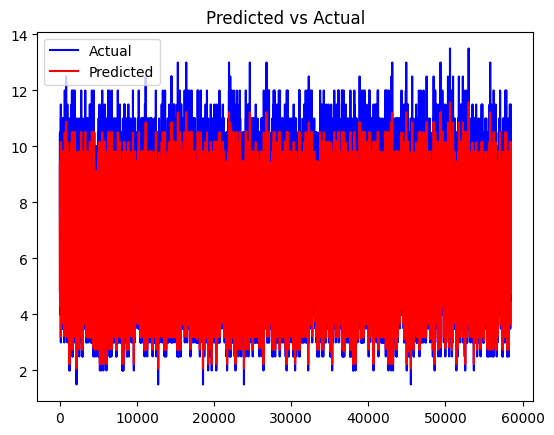

In [ ]:
# Predicted vs Actual graph
plt.subplot(1, 1, 1)
plt.plot(y_test, color='blue', label='Actual')
plt.plot(y_pred, color='red', label='Predicted')
plt.title('Predicted vs Actual')
plt.legend()



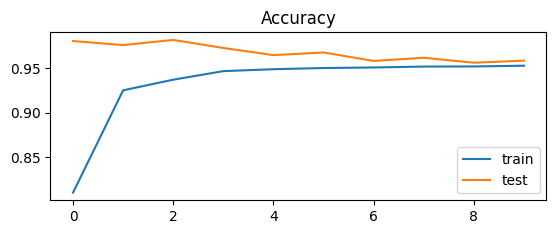

In [ ]:
# Accuracy graph
plt.subplot(2, 1, 1)
plt.plot(history.history['r_squared'], label='train')
plt.plot(history.history['val_r_squared'], label='test')
plt.title('Accuracy')
plt.legend()

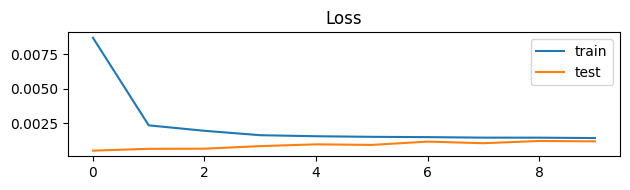

In [ ]:
# Loss graph
plt.subplot(3, 1, 2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()